In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Create short and long moving average : MA10 and MA50
#use dropna to remove any "Not a Number" data
fb = pd.read_csv('data/facebook.csv',index_col = 'Date')
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-03-13,78.599998,79.379997,77.680000,78.050003,78.050003,18557300,79.301001,77.3506
2015-03-16,77.959999,78.120003,77.360001,78.070000,78.070000,19305400,79.133001,77.3516
2015-03-17,78.360001,79.779999,78.339996,79.360001,79.360001,22170000,79.109001,77.3698
2015-03-18,79.250000,81.239998,79.169998,80.910004,80.910004,36912400,79.110001,77.4442
2015-03-19,81.120003,83.000000,81.000000,82.750000,82.750000,42099500,79.264001,77.5762


In [4]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]

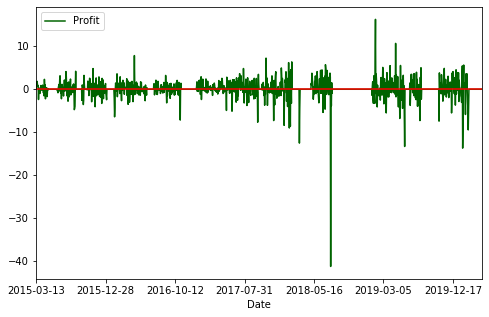

In [17]:
#Add a new column "Profit" using List Comprehension, for any rows in fb, if Shares=1, the profit is calculated 
#as the close price of tomorrow - the close price of today. Otherwise the profit is 0.
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot(color='darkgreen',figsize=(8,5))
plt.axhline(y=0, color='red')
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Total money you win is 51.570016000000024')

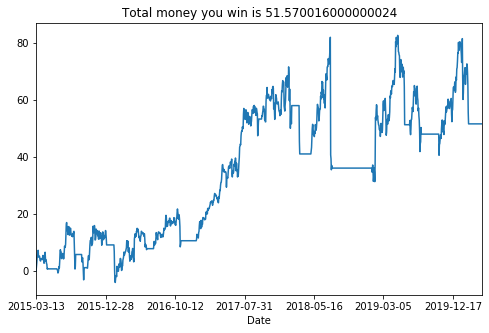

In [7]:
#Calculate the accumulated wealth over the period and plot the wealth to show the growth of profit over the period
fb['wealth'] = fb['Profit'].cumsum()
fb['wealth'].plot(figsize=(8,5))
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))

In [13]:
#Create a new column Price Difference and Return
fb['PriceDiff'] = fb['Close'].shift(-1) - fb['Close']
fb['Return'] = fb['PriceDiff'] /fb['Close']

In [14]:
#Create column Direction that represents 1 if the price difference is larger than 0 and o otherwise
fb['Direction'] = [1 if fb['PriceDiff'].loc[ei] > 0 else 0 for ei in fb.index ]

In [20]:
# Run the following code to show the price difference on 2015-03-13
print('Price difference on {} is {}. direction is {}'.
      format('2015-03-13', fb['PriceDiff'].loc['2015-03-13'], fb['Direction'].loc['2015-03-13']))

Price difference on 2015-03-13 is 0.019996999999989384. direction is 1


In [ ]:
fb['ma50'] = fb['Close'].rolling(50).mean()
fb.head()
#plot the moving average
plt.figure(figsize=(10, 8))
fb['ma50'].loc['2015-03-15':'2015-12-31'].plot(label='MA50')
fb['Close'].loc['2015-01-01':'2015-12-31'].plot(label='Close')
plt.legend()
plt.show()

In [21]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth,PriceDiff,Return,Direction
Date,,,,,,,,,,,,,,,
2015-03-13,78.599998,79.379997,77.680000,78.050003,78.050003,18557300,79.301001,77.3506,1,78.070000,0.019997,0.019997,0.019997,0.000256,1
2015-03-16,77.959999,78.120003,77.360001,78.070000,78.070000,19305400,79.133001,77.3516,1,79.360001,1.290001,1.309998,1.290001,0.016524,1
2015-03-17,78.360001,79.779999,78.339996,79.360001,79.360001,22170000,79.109001,77.3698,1,80.910004,1.550003,2.860001,1.550003,0.019531,1
2015-03-18,79.250000,81.239998,79.169998,80.910004,80.910004,36912400,79.110001,77.4442,1,82.750000,1.839996,4.699997,1.839996,0.022741,1
2015-03-19,81.120003,83.000000,81.000000,82.750000,82.750000,42099500,79.264001,77.5762,1,83.800003,1.050003,5.750000,1.050003,0.012689,1
